# Visualizing Stimulus Templates

NWB Files have a section for providing the visual content used as stimulus during a session. These can be in the form of images or videos, and are stored in the file's `stimulus_template` section. This notebook shows how to retrieve and display this information from multiple NWB files with different NWB storage formats.

### Environment Setup
⚠️**Note: If running on a new environment, run this cell once and then restart the kernel**⚠️

In [1]:
import warnings
warnings.filterwarnings('ignore')

try:
    from databook_utils.dandi_utils import dandi_download_open
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook
    %pip install -e .

In [2]:
import matplotlib.pyplot as plt

from mpl_interactions import hyperslicer

### Visualizing Stimulus Image Templates
For displaying image templates, we will use the public dandiset [Differential encoding of temporal context and expectation](https://dandiarchive.org/dandiset/000488). This dataset contains both natural and artificial stimulus in the form of images. The `stimulus_template` section takes the form of a dictionary of template groups. Each template group is also a dictionary which contains images. Below, you can change `dandiset_id` and `dandi_filepath` to access different files if you wish. The file will be downloaded and opened.

In [3]:
dandiset_id = "000488"
dandi_filepath = "sub-416366/sub-416366_ses-768476976_behavior+image+ophys.nwb"
download_loc = "."

In [4]:
# This can sometimes take a while depending on the size of the file
io1 = dandi_download_open(dandiset_id, dandi_filepath, download_loc)
nwb1 = io1.read()

File already exists
Opening file


In [5]:
for key in nwb1.stimulus_template.keys():
    print(key)

Images from 103_68_7fcb9723dc41d69987662fe9c9fc6fd6.npy
Images from 110_68_ed871f890173b657723d0a1e83289a0d.npy
Images from 111_68_af3cde68447d1e6e5ec715c7acbd62ab.npy
Images from 112_68_4fffefd365c0de14aee4f506f7a8d4ef.npy
Images from 13_103_b9a33c3b401538ae053144a78ca918ec.npy
Images from 13_110_9fb8a433dfff62b6fbc061c99cf64682.npy
Images from 13_111_d59bd95cd944f4a948bd983aa3393c5e.npy
Images from 13_112_75ee28af87f82a069754803a2c1e92cf.npy
Images from 13_17_c19ee95e08a25696fc5e7c2edfd20f94.npy
Images from 13_22_a6c62110e211048c57e421cf5f783bac.npy
Images from 13_26_45e997f20a2d56bc54a31b2ef3c4d2a6.npy
Images from 13_51_c4ff749440c735e2441bdf19e32f3347.npy
Images from 13_6_b689a86c3aed3544ce7038a5164ce8d0.npy
Images from 13_71_4c979c7b2cfc6be45d8111a161bcd181.npy
Images from 13_89_10a592bc1d0136eac9c332023c4fad1a.npy
Images from 17_68_c44244b2818c1d9d8305fbd84cebea08.npy
Images from 22_68_e90bc7a3204e763dc7e295f87473dd38.npy
Images from 26_68_56949723a23eb5cf490f11ca4da31aef.npy
Ima

### Natural Image Template
You can select an individual stimulus template image by using the keys printed. The keys to select a template group are printed above. Once a template group is selected, you can pick a key from the template group to select and individual template image. In this example, a natural image is selected and displayed.

In [6]:
stim_image_template = nwb1.stimulus_template["Images from 110_68_ed871f890173b657723d0a1e83289a0d.npy"]
stim_image_template.images.keys()

dict_keys(['transition_control110_68_ed871f890173b657723d0a1e83289a0d_0', 'transition_control110_68_ed871f890173b657723d0a1e83289a0d_1'])

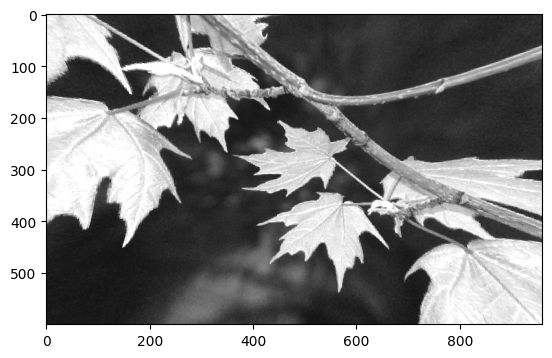

In [7]:
%matplotlib inline
img = stim_image_template.images["transition_control110_68_ed871f890173b657723d0a1e83289a0d_0"]
plt.imshow(img, cmap="gray")

### Artificial Image Template
It is common for visual stimulus to also include artificial stimulus images. One such image is selected and shown below.

In [8]:
stim_image_template = nwb1.stimulus_template["Images from 6_68_753d1dc8898f90cfddc0a34260c99b94.npy"]
stim_image_template.images.keys()

dict_keys(['transition_control6_68_753d1dc8898f90cfddc0a34260c99b94_0', 'transition_control6_68_753d1dc8898f90cfddc0a34260c99b94_1'])

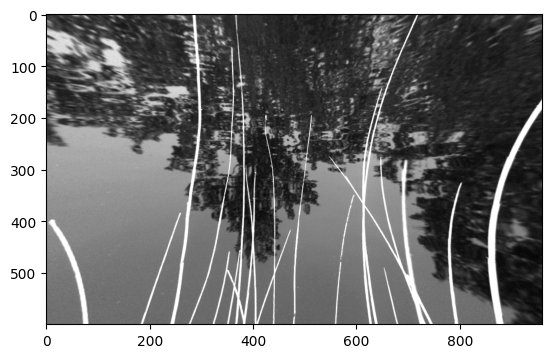

In [9]:
%matplotlib inline
img = stim_image_template.images["transition_control6_68_753d1dc8898f90cfddc0a34260c99b94_1"]
plt.imshow(img, cmap="gray")

### All Stim Images
Here, all the stimulus images are retrieved from the file and put into an list of images. A subset of these are displayed together. If your NWB file stores template information differently, this may not work. In this particular example, the first 100 image from the session are displayed.

In [10]:
all_stim_templates = []
for template_set in nwb1.stimulus_template.values():
    all_stim_templates += list(template_set.images.values())

print(len(all_stim_templates))
# there are > 2000 templates; only show the first 100; change this to suit your needs
stim_templates = all_stim_templates[:100]

2012


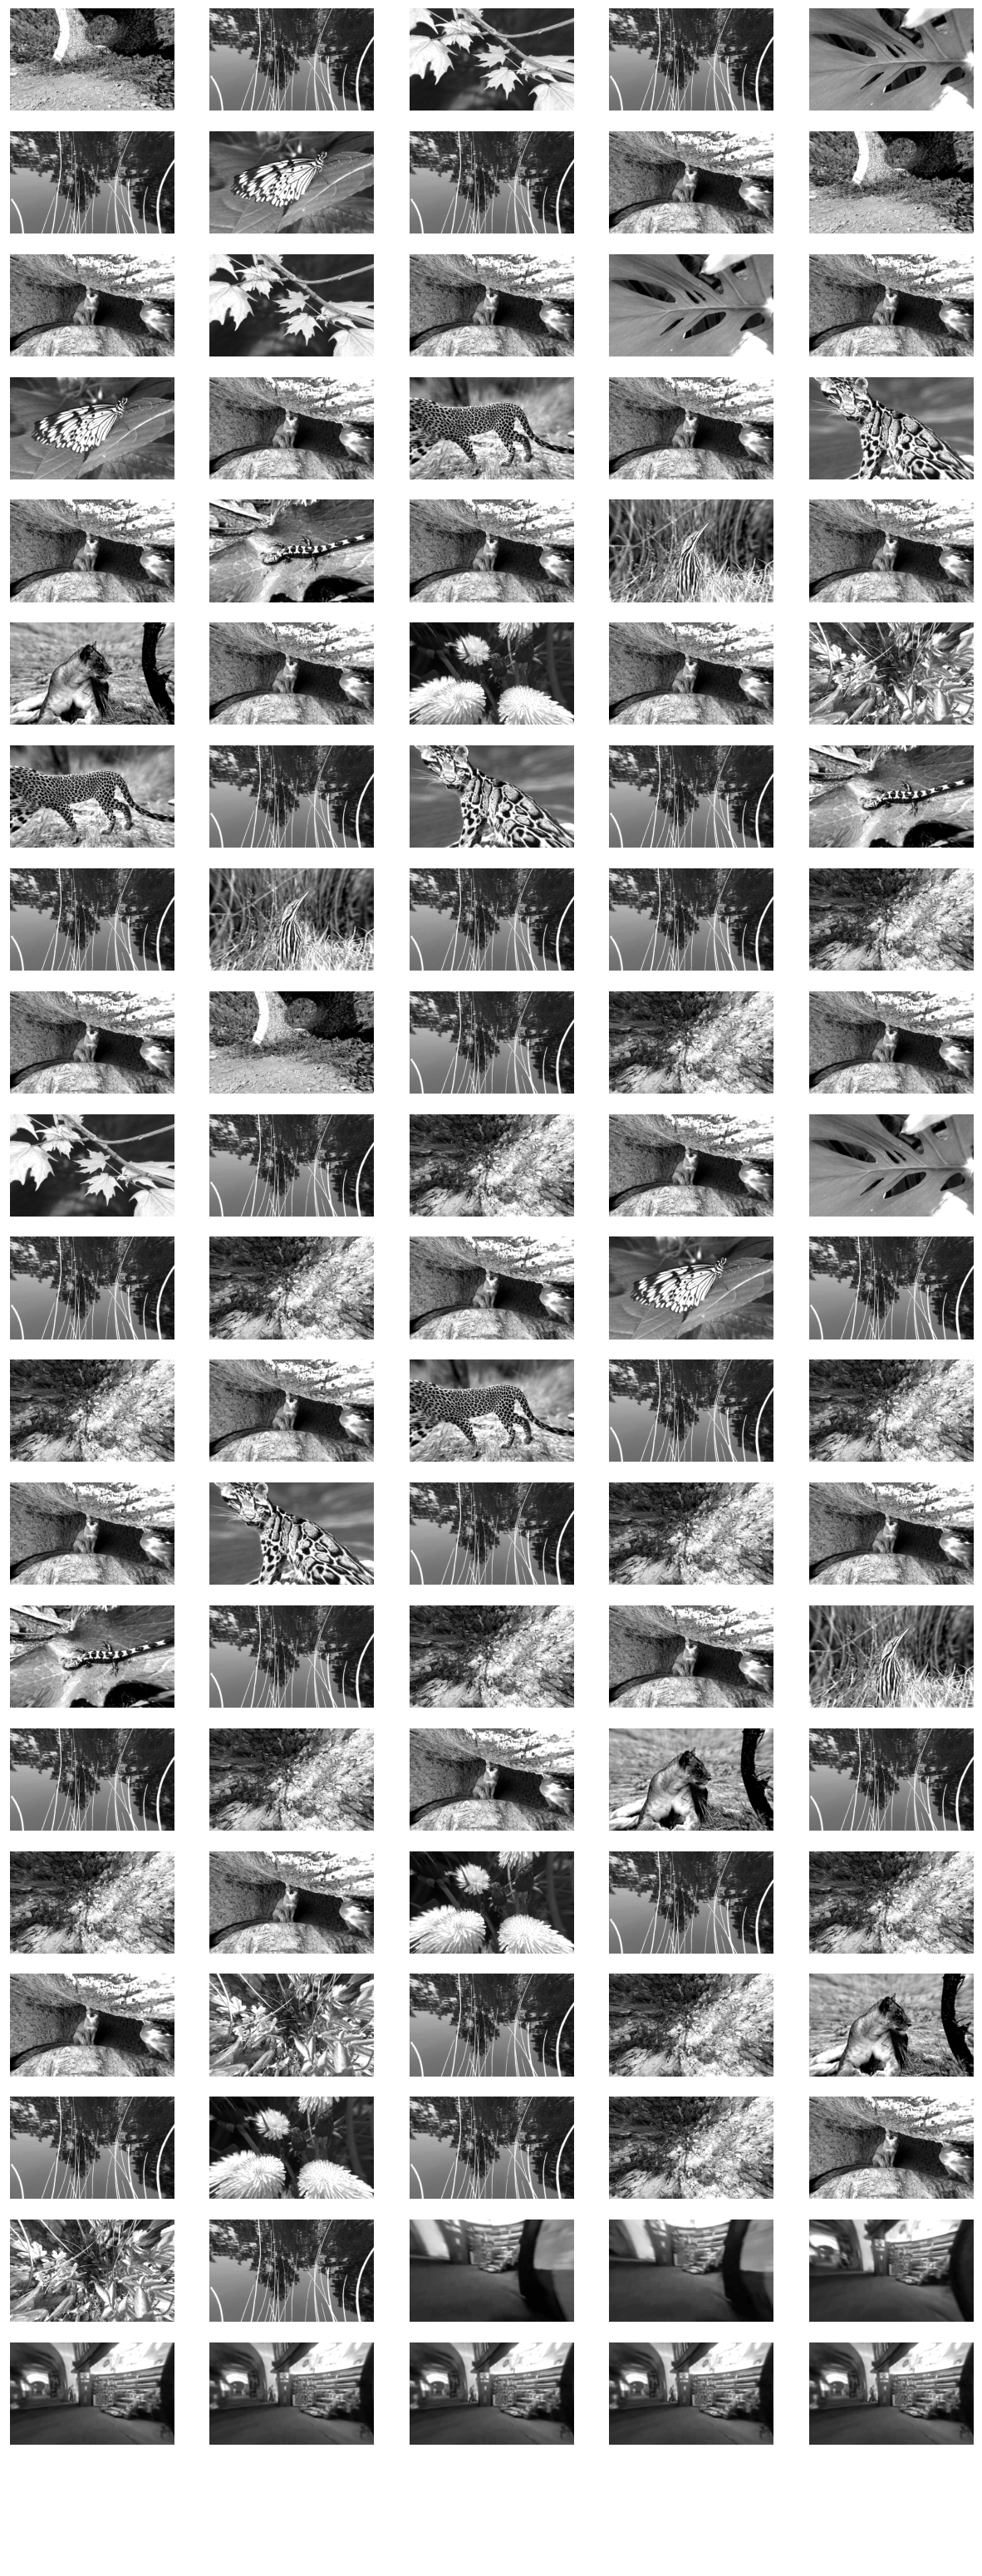

In [11]:
%matplotlib inline

n_cols = 5
n_rows = len(stim_templates) // n_cols
fig, axes = plt.subplots(n_rows+1, n_cols)
fig.set_size_inches(3*n_cols, 2*n_rows) # can tweak these if sizing/spacing needs improvement

if len(axes.shape) == 1:
    axes = axes.reshape((1, axes.shape[0]))

for i, template in enumerate(stim_templates):
    ax_row = int(i / n_cols)
    ax_col = i % n_cols
    axes[ax_row][ax_col].imshow(template, cmap="gray")

for ax in axes.flat:
    ax.axis("off")

### Visualizing Stimulus Movie Template
The `stimulus_template` section can also be used to store stimulus movies. For this dataset, the movie is stored as a template group within the stimulus templates dictionary. You can change the key used to below to select a different move. The movie can be accessed with the `.data` property. This notebook uses **matplotlib_interactions** `hyperslicer` method to display and play this movie below.

In [12]:
dandiset_id = "000036"
dandi_filepath = "sub-389014/sub-389014_ses-20180705T152908_behavior+image+ophys.nwb"
download_loc = "."

In [13]:
# This can sometimes take a while depending on the size of the file
io2 = dandi_download_open(dandiset_id, dandi_filepath, download_loc)
nwb2 = io2.read()

PATH                                                    SIZE   DONE            DONE% CHECKSUM STATUS          MESSAGE
sub-389014_ses-20180705T152908_behavior+image+ophys.nwb 1.3 GB 1.3 GB           100%    ok    done                   
Summary:                                                1.3 GB 1.3 GB                         1 done                 
                                                               100.00%                                               
Downloaded file to ./sub-389014_ses-20180705T152908_behavior+image+ophys.nwb
Opening file


In [14]:
nwb2.stimulus_template.keys()

dict_keys(['conspecifics', 'crickets', 'dots', 'human_montage', 'man_writing', 'mouse_montage_1', 'mouse_montage_1_spatial_phase_scramble', 'mouse_montage_1_temporal_phase_scramble', 'mouse_montage_2', 'mousecam', 'mousecam_spatial_phase_scramble', 'noise', 'snake', 'spontaneous'])

In [15]:
# change this key to anything from the list above
stim_movie_template = nwb2.stimulus_template["mouse_montage_1"]
stim_movie_template

mouse_montage_1 pynwb.image.ImageSeries at 0x2058886293600
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (900, 120, 192), type "|u1">
  description: no description
  format: raw
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (0,), type "<f8">
  timestamps_unit: seconds
  unit: NA

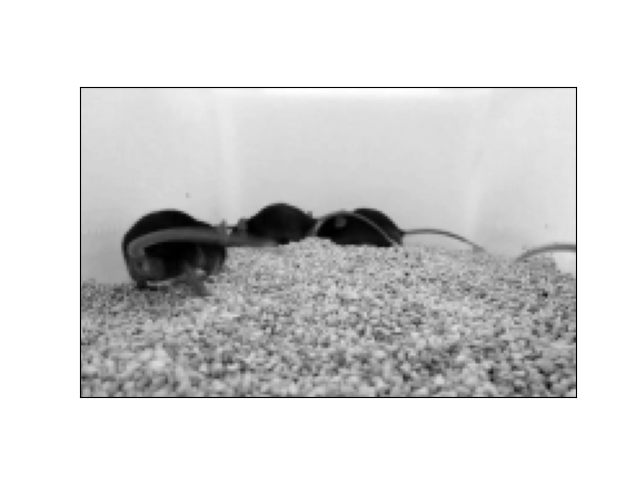

In [16]:
%matplotlib ipympl
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
view = hyperslicer(stim_movie_template.data, play_buttons=True, cmap="gray")